### Dijkstra Algorithm

Distance of  a  from source vertex:  0
Distance of  b  from source vertex:  2
Distance of  c  from source vertex:  1
Distance of  d  from source vertex:  2
Distance of  e  from source vertex:  3
Distance of  f  from source vertex:  3
Distance of  g  from source vertex:  3
Distance of  h  from source vertex:  4
Distance of  i  from source vertex:  4
Distance of  j  from source vertex:  3
Distance of  k  from source vertex:  2


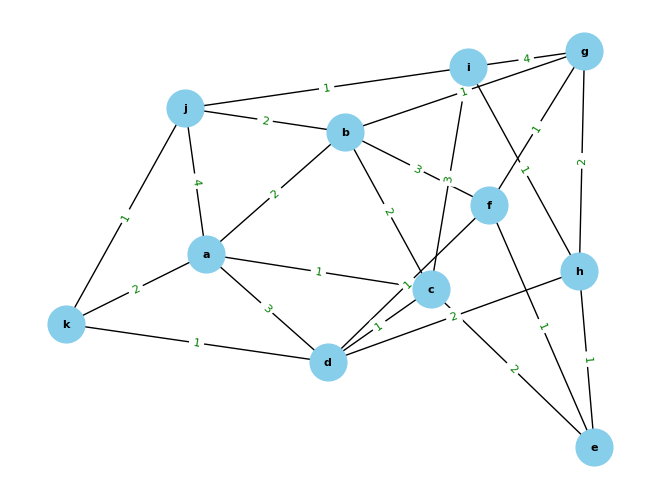

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

import sys


vertices = [
    [0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1],
    [1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0],
    [1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0],
    [1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1],
    [0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0],
    [0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0],
    [0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0],
    [0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0],
    [1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1],
    [1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]
]

# Edge weight matrix
edges = [
    [0, 2, 1, 3, 0, 0, 0, 0, 0, 4, 2],
    [2, 0, 2, 0, 0, 3, 1, 0, 0, 2, 0],
    [1, 2, 0, 1, 2, 0, 0, 0, 3, 0, 0],
    [3, 0, 1, 0, 0, 1, 0, 2, 0, 0, 1],
    [0, 0, 2, 0, 0, 1, 0, 1, 0, 0, 0],
    [0, 3, 0, 1, 1, 0, 1, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 1, 0, 2, 4, 0, 0],
    [0, 0, 0, 2, 1, 0, 2, 0, 1, 0, 0],
    [0, 0, 3, 0, 0, 0, 4, 1, 0, 1, 0],
    [4, 2, 0, 0, 0, 0, 0, 0, 1, 0, 1],
    [2, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0]
]



# Find which vertex is to be visited next
def to_be_visited():
    global visited_and_distance
    v = -10
    for index in range(num_of_vertices):
        if visited_and_distance[index][0] == 0 \
            and (v < 0 or visited_and_distance[index][1] <=
                 visited_and_distance[v][1]):
            v = index
    return v


num_of_vertices = len(vertices[0])

visited_and_distance = [[0, 0]]
for i in range(num_of_vertices-1):
    visited_and_distance.append([0, sys.maxsize])

for vertex in range(num_of_vertices):

    to_visit = to_be_visited()
    for neighbor_index in range(num_of_vertices):

        if vertices[to_visit][neighbor_index] == 1 and \
                visited_and_distance[neighbor_index][0] == 0:
            new_distance = visited_and_distance[to_visit][1] \
                + edges[to_visit][neighbor_index]
            if visited_and_distance[neighbor_index][1] > new_distance:
                visited_and_distance[neighbor_index][1] = new_distance

        visited_and_distance[to_visit][0] = 1

i = 0

for distance in visited_and_distance:
    print("Distance of ", chr(ord('a') + i),
          " from source vertex: ", distance[1])
    i = i + 1

G = nx.Graph()

for i in range(num_of_vertices):
    G.add_node(chr(ord('a') + i))

for i in range(num_of_vertices):
    for j in range(num_of_vertices):
        if vertices[i][j] == 1:
            G.add_edge(chr(ord('a') + i), chr(ord('a') + j), weight=edges[i][j])

pos = nx.spring_layout(G)
nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=700, node_color='skyblue', font_size=8)

edge_labels = {(chr(ord('a') + i), chr(ord('a') + j)): edges[i][j] for i in range(num_of_vertices) for j in range(num_of_vertices) if vertices[i][j] == 1}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='green', font_size=8)

plt.show()

### Kruskal Algorithm

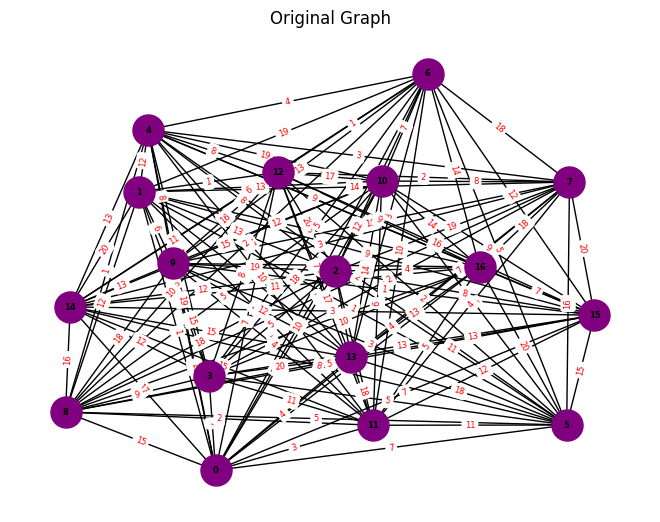

Edges in the constructed MST
0 -- 1 == 1
0 -- 6 == 1
1 -- 5 == 1
1 -- 12 == 1
4 -- 8 == 1
9 -- 15 == 1
3 -- 7 == 2
4 -- 5 == 2
7 -- 12 == 2
8 -- 11 == 2
8 -- 16 == 2
2 -- 11 == 3
4 -- 15 == 3
6 -- 13 == 3
7 -- 14 == 3
8 -- 10 == 5
Minimum Spanning Tree 33


In [12]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import imageio.v2 as imageio
import os

class Graph:

    def __init__(self, vertices):
        self.V = vertices
        self.graph = []

    def generateRandomGraph(self):
        for u in range(self.V):
            for v in range(u + 1, self.V):
                w = random.randint(1, 20)  # Adjust the range of weights as needed
                self.addEdge(u, v, w)

    def addEdge(self, u, v, w):
        self.graph.append([u, v, w])

    def find(self, parent, i):
        if parent[i] != i:
            parent[i] = self.find(parent, parent[i])
        return parent[i]

    def union(self, parent, rank, x, y):
        if rank[x] < rank[y]:
            parent[x] = y
        elif rank[x] > rank[y]:
            parent[y] = x
        else:
            parent[y] = x
            rank[x] += 1

    def visualizeMST(self, G_mst, step):
        pos_mst = nx.spring_layout(G_mst)
        nx.draw(G_mst, pos_mst, with_labels=True, font_weight='bold', node_size=400, node_color="red", font_size=6)
        labels_mst = nx.get_edge_attributes(G_mst, 'weight')
        nx.draw_networkx_edge_labels(G_mst, pos_mst, edge_labels=labels_mst, font_size=6, font_color='green')
        plt.title(f'Kruskal MST - Step {step}')
        plt.savefig(f'mst_step_{step}.png')
        plt.close()

    def KruskalMST(self):
        result = []
        i = 0
        e = 0
        self.graph = sorted(self.graph, key=lambda item: item[2])

        parent = []
        rank = []

        for node in range(self.V):
            parent.append(node)
            rank.append(0)

        while e < self.V - 1:
            u, v, w = self.graph[i]
            i = i + 1
            x = self.find(parent, u)
            y = self.find(parent, v)

            if x != y:
                e = e + 1
                result.append([u, v, w])
                self.union(parent, rank, x, y)

                # Visualization of the current MST and save the image
                G_mst = nx.Graph()
                for x, y, weight in result:
                    G_mst.add_edge(x, y, weight=weight)
                self.visualizeMST(G_mst, e)
        minimumCost = 0
        print("Edges in the constructed MST")
        for u, v, weight in result:
            minimumCost += weight
            print("%d -- %d == %d" % (u, v, weight))
        print("Minimum Spanning Tree", minimumCost)


        
        images = []
        for i in range(1, e + 1):
            images.append(imageio.imread(f'mst_step_{i}.png'))

        imageio.mimsave('kruskal_mst.gif', images, fps=1)

        # Clean up: Remove the saved images
        for i in range(1, e + 1):
            os.remove(f'mst_step_{i}.png')


if __name__ == '__main__':
    g = Graph(random.randint(10, 20))
    g.generateRandomGraph()

    # Draw the original graph
    G_original = nx.Graph()
    for u, v, weight in g.graph:
        G_original.add_edge(u, v, weight=weight)

    pos_original = nx.spring_layout(G_original)
    nx.draw(G_original, pos_original, with_labels=True, font_weight='bold', node_size=500, node_color="purple", font_size=6)
    labels_original = nx.get_edge_attributes(G_original, 'weight')
    nx.draw_networkx_edge_labels(G_original, pos_original, edge_labels=labels_original, font_size=6, font_color='red')
    plt.title('Original Graph')
    plt.show()


    g.KruskalMST()

### Augmenting Flow Algorithm

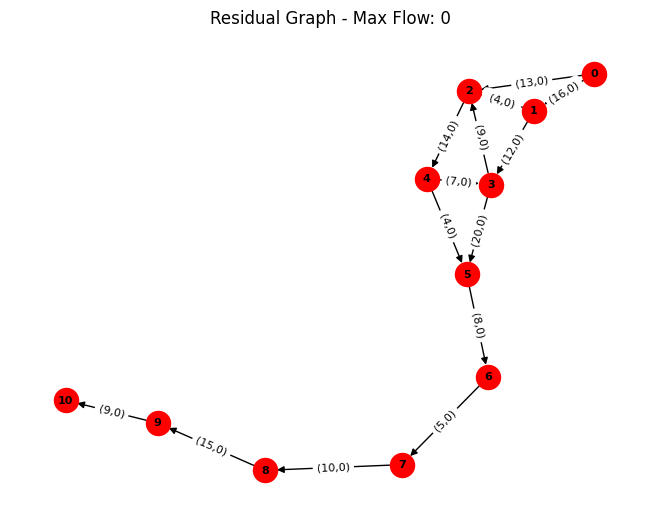

Augmenting Path: [(0, 1), (1, 3), (3, 5), (5, 6), (6, 7), (7, 8), (8, 9), (9, 10)], Final Flow: 5, Final Capacity: 0


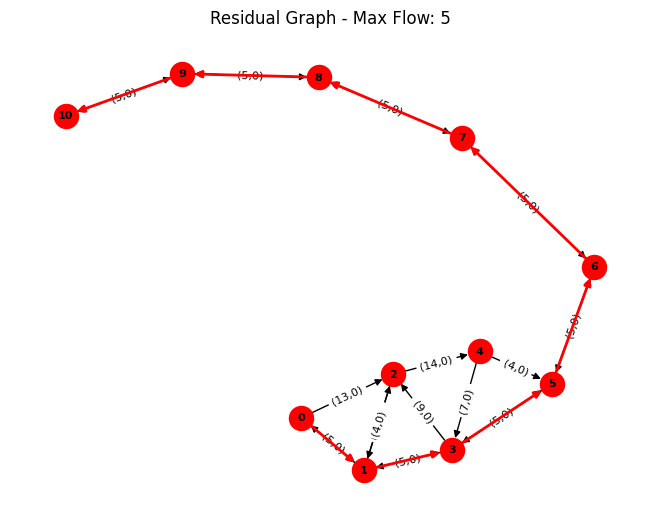

The maximum possible flow is 5


In [8]:
import networkx as nx
import matplotlib.pyplot as plt

class Graph:

    def __init__(self, graph):
        self.graph = graph
        self.ROW = len(graph)

    def searching_algo_BFS(self, s, t, parent):
        visited = [False] * (self.ROW)
        queue = []
        queue.append(s)
        visited[s] = True

        while queue:
            u = queue.pop(0)

            for ind, val in enumerate(self.graph[u]):
                if visited[ind] == False and val > 0:
                    queue.append(ind)
                    visited[ind] = True
                    parent[ind] = u

        return True if visited[t] else False

    def augmenting_flow(self, source, sink):
        parent = [-1] * (self.ROW)
        max_flow = 0

        while self.searching_algo_BFS(source, sink, parent):
            path_flow = float("Inf")
            s = sink
            path_edges = []

            while s != source:
                path_flow = min(path_flow, self.graph[parent[s]][s])
                path_edges.insert(0, (parent[s], s))  # Insert at the beginning to maintain order
                s = parent[s]

            max_flow += path_flow

            v = sink
            while v != source:
                u = parent[v]
                self.graph[u][v] -= path_flow
                self.graph[v][u] += path_flow
                v = parent[v]

            # Print the augmenting path and final flow/capacity
            print(f'Augmenting Path: {path_edges}, Final Flow: {path_flow}, Final Capacity: {self.graph[u][v]}')

            # Visualize the graph after each iteration
            self.visualizeGraph(path_edges, max_flow)

        return max_flow

    def visualizeGraph(self, path_edges, max_flow):
        G = nx.DiGraph()
        for i in range(self.ROW):
            for j in range(self.ROW):
                if self.graph[i][j] > 0:
                    G.add_edge(i, j, capacity=self.graph[i][j], flow=0)

        pos = nx.spring_layout(G)
        nx.draw(G, pos, with_labels=True, font_weight='bold', node_size=300, node_color="red", font_size=8)

        # Add labels for capacity and flow on each edge
        labels = {(u, v): f"({self.graph[u][v]},{G[u][v]['flow']})"
                  for u, v in G.edges()}
        nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_size=8)

        # Highlight the edges in the augmenting path
        path_edges_edges = [(u, v) for u, v in path_edges]
        nx.draw_networkx_edges(G, pos, edgelist=path_edges_edges, edge_color='red', width=2)

        plt.title(f'Residual Graph - Max Flow: {max_flow}')
        plt.show()

# Create a graph given in the above diagram
graph = [[0, 16, 13, 0, 0, 0, 0, 0, 0, 0, 0],
         [0, 0, 10, 12, 0, 0, 0, 0, 0, 0, 0],
         [0, 4, 0, 0, 14, 0, 0, 0, 0, 0, 0],
         [0, 0, 9, 0, 0, 20, 0, 0, 0, 0, 0],
         [0, 0, 0, 7, 0, 4, 0, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 8, 0, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 5, 0, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 10, 0, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 15, 0],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 9],
         [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]]

g = Graph(graph)

source = 0
sink = 10

# Visualize the initial graph
g.visualizeGraph([], 0)

# Find maximum flow and display output
max_flow = g.augmenting_flow(source, sink)
print(f"The maximum possible flow is {max_flow}")
